In this notebook, we maily
1.   obtain sentiment score by using VADER and TextBlob
2.   Test the possibility of using SA as a proxy for IPANAS




# Load processed data


In [ ]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
raw_data = pd.read_csv("/content/drive/MyDrive/codeAndData/data/SA.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data = pd.read_csv("./data/SA.csv")


In [ ]:
raw_data

,created_at,full_text,is_quote_status,retweet_count,favorite_count,possibly_sensitive,Attentive,Alert,Determined,Inspired,Active,Hostile,Ashamed,Upset,Afraid,Nervous,Positive_affect,Negative_affect,OriginalText,SWB,is_reply,days_since_COVID19,hour,url_count,mentions_count,questionmark_count,exclamationmark_count,points_count,uppercase_ratio,hashtag_count,clean_text
0,2020-01-26 18:40:19+00:00,Fear will make people say (and act) things the...,False,0,2,False,3.0,2.5,1.0,1.0,2.0,2.0,2.0,3.5,4.0,1.5,9.5,13.0,@TerriChu Fear will make people say (and act) ...,-3.5,True,-4,18,0,1,0,0,5,0.025000,1,fear people act thing normally not human natur...
1,2020-01-26 22:08:12+00:00,"Wtf? Did I just heard it right on , that over ...",False,2,0,False,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,21.0,RT @KassSunshine: Wtf? Did I just heard it rig...,-16.0,False,-4,22,0,2,1,0,0,0.027778,1,wtf hear right people land uk coronarvirus qua...
2,2020-01-26 18:46:42+00:00,Nice tracking site for the coronavirus....howe...,False,0,1,False,1.0,2.5,1.0,1.0,1.0,4.5,1.0,4.0,4.0,5.0,6.5,18.5,Nice tracking site for the coronavirus....howe...,-12.0,False,-4,18,1,0,0,0,5,0.033333,4,nice tracking site coronavirushowever think no...
3,2020-01-26 19:09:01+00:00,3 cases so far....and counting. I don’t trust ...,False,0,0,False,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,21.0,@TheRynheart 3 cases so far....and counting. I...,-16.0,True,-4,19,0,1,0,0,7,0.063158,1,case farand count not trust trump not trust ch...
4,2020-01-26 22:07:50+00:00,"Look, I'm no ethicist &amp; the &amp; can do w...",False,1,7,False,1.0,1.0,1.0,1.0,1.0,5.0,3.0,5.0,5.0,5.0,5.0,23.0,"Look, I'm no ethicist &amp; the @nytimes &amp...",-18.0,False,-4,22,0,2,0,0,1,0.014760,2,look ethicist hell want wrong hide break news ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,2021-07-12 04:56:09+00:00,Who all are allowed to travel by train and is ...,False,0,0,False,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.5,3.5,9.0,8.0,@BJP4India @mybmc @Central_Railway @WesternRly...,1.0,False,529,4,0,4,1,0,1,0.080402,3,allow travel train pass require travel train o...
5850,2021-07-12 16:07:55+00:00,I’d rather risk dying to be part of the soluti...,False,0,2,False,1.0,1.0,3.0,3.0,3.0,4.0,1.0,2.0,1.5,2.0,11.0,10.5,I’d rather risk dying to be part of the soluti...,0.5,False,529,16,1,0,0,0,1,0.080292,1,risk die solution die willfully recklessly pro...
5851,2021-07-13 08:24:44+00:00,So the 1st pic was on a friends Facebook page…...,False,0,0,False,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,5.0,9.0,So the 1st pic was on a friends Facebook page…...,-4.0,False,530,8,1,0,0,0,1,0.043307,3,st pic friend facebook page … marilyn personag...
5852,2021-07-13 06:58:35+00:00,If the jab is so effective why do we need to f...,False,0,0,False,2.0,1.5,1.0,1.5,1.5,2.0,1.0,2.0,1.0,1.0,7.5,7.0,If the jab is so effective why do we need to f...,0.5,False,530,6,0,1,1,0,0,0.024793,1,jab effective need force people not safetyface...


# Vader

In [ ]:
#sentiment analysis (VADER)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
raw_data.head()

In [ ]:
# creat vander
raw_data['neg'] = raw_data['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
raw_data['neu'] = raw_data['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
raw_data['pos'] = raw_data['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
raw_data['compound'] = raw_data['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

In [ ]:
raw_data.shape[0]

## scaling

In [ ]:
raw_data['SWB'].describe()

In [ ]:
raw_data['Positive_affect'].describe()

In [ ]:
raw_data['Negative_affect'].describe()

In [ ]:
#scale dependent variables
raw_data.SWB = (raw_data.SWB)/20
raw_data.Positive_affect = (raw_data.Positive_affect-5)/20
raw_data.Negative_affect = (raw_data.Negative_affect-5)/20

In [ ]:
raw_data['Positive_affect'].value_counts()

In [ ]:
raw_data['Negative_affect'].value_counts()

In [ ]:
raw_data['SWB'].value_counts()

In [ ]:
raw_data['Positive_affect'].value_counts()

In [ ]:
raw_data['Negative_affect'].value_counts()

In [ ]:
raw_data['SWB'].value_counts()

range(2, 16)


# TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
raw_data['TextBlob_score'] = raw_data['clean_text'].apply(lambda s: TextBlob(s).sentiment.polarity)

In [ ]:
raw_data

,created_at,full_text,is_quote_status,retweet_count,favorite_count,possibly_sensitive,Attentive,Alert,Determined,Inspired,Active,Hostile,Ashamed,Upset,Afraid,Nervous,Positive_affect,Negative_affect,OriginalText,SWB,is_reply,days_since_COVID19,hour,url_count,mentions_count,questionmark_count,exclamationmark_count,points_count,uppercase_ratio,hashtag_count,clean_text
0,2020-01-26 18:40:19+00:00,Fear will make people say (and act) things the...,False,0,2,False,3.0,2.5,1.0,1.0,2.0,2.0,2.0,3.5,4.0,1.5,0.225,0.400,@TerriChu Fear will make people say (and act) ...,-0.175,True,-4,18,0,1,0,0,5,0.025000,1,fear people act thing normally not human natur...
1,2020-01-26 22:08:12+00:00,"Wtf? Did I just heard it right on , that over ...",False,2,0,False,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,0.000,0.800,RT @KassSunshine: Wtf? Did I just heard it rig...,-0.800,False,-4,22,0,2,1,0,0,0.027778,1,wtf hear right people land uk coronarvirus qua...
2,2020-01-26 18:46:42+00:00,Nice tracking site for the coronavirus....howe...,False,0,1,False,1.0,2.5,1.0,1.0,1.0,4.5,1.0,4.0,4.0,5.0,0.075,0.675,Nice tracking site for the coronavirus....howe...,-0.600,False,-4,18,1,0,0,0,5,0.033333,4,nice tracking site coronavirushowever think no...
3,2020-01-26 19:09:01+00:00,3 cases so far....and counting. I don’t trust ...,False,0,0,False,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,0.000,0.800,@TheRynheart 3 cases so far....and counting. I...,-0.800,True,-4,19,0,1,0,0,7,0.063158,1,case farand count not trust trump not trust ch...
4,2020-01-26 22:07:50+00:00,"Look, I'm no ethicist &amp; the &amp; can do w...",False,1,7,False,1.0,1.0,1.0,1.0,1.0,5.0,3.0,5.0,5.0,5.0,0.000,0.900,"Look, I'm no ethicist &amp; the @nytimes &amp...",-0.900,False,-4,22,0,2,0,0,1,0.014760,2,look ethicist hell want wrong hide break news ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,2021-07-12 04:56:09+00:00,Who all are allowed to travel by train and is ...,False,0,0,False,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.5,3.5,0.200,0.150,@BJP4India @mybmc @Central_Railway @WesternRly...,0.050,False,529,4,0,4,1,0,1,0.080402,3,allow travel train pass require travel train o...
5850,2021-07-12 16:07:55+00:00,I’d rather risk dying to be part of the soluti...,False,0,2,False,1.0,1.0,3.0,3.0,3.0,4.0,1.0,2.0,1.5,2.0,0.300,0.275,I’d rather risk dying to be part of the soluti...,0.025,False,529,16,1,0,0,0,1,0.080292,1,risk die solution die willfully recklessly pro...
5851,2021-07-13 08:24:44+00:00,So the 1st pic was on a friends Facebook page…...,False,0,0,False,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,0.000,0.200,So the 1st pic was on a friends Facebook page…...,-0.200,False,530,8,1,0,0,0,1,0.043307,3,st pic friend facebook page … marilyn personag...
5852,2021-07-13 06:58:35+00:00,If the jab is so effective why do we need to f...,False,0,0,False,2.0,1.5,1.0,1.5,1.5,2.0,1.0,2.0,1.0,1.0,0.125,0.100,If the jab is so effective why do we need to f...,0.025,False,530,6,0,1,1,0,0,0.024793,1,jab effective need force people not safetyface...


In [ ]:
#write to csv
raw_data.to_csv("/content/drive/MyDrive/codeAndData/data/ModelData.csv",index=False)

# Descriptive statistics

In [ ]:
import pandas as pd

# List of continuous variables you want to analyze
continuous_vars = [
    'hour', 'retweet_count', 'favorite_count', 'url_count',
    'mentions_count', 'questionmark_count', 'exclamationmark_count',
    'points_count', 'uppercase_ratio', 'hashtag_count'
]

# Create a dictionary to store the statistics for each column
summary_stats = {
    'Mean': raw_data[continuous_vars].mean(),
    'Min': raw_data[continuous_vars].min(),
    'Median': raw_data[continuous_vars].median(),
    'Max': raw_data[continuous_vars].max()
}

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.round(2)

summary_df


,Mean,Min,Median,Max
hour,12.56,0.0,14.00,23.0
retweet_count,20.97,0.0,0.00,14075.0
favorite_count,7.45,0.0,0.00,5261.0
url_count,0.48,0.0,0.00,6.0
mentions_count,1.05,0.0,1.00,50.0
questionmark_count,0.24,0.0,0.00,11.0
exclamationmark_count,0.32,0.0,0.00,12.0
points_count,1.89,0.0,1.00,58.0
uppercase_ratio,0.07,0.0,0.06,0.8
hashtag_count,2.82,0.0,2.00,26.0


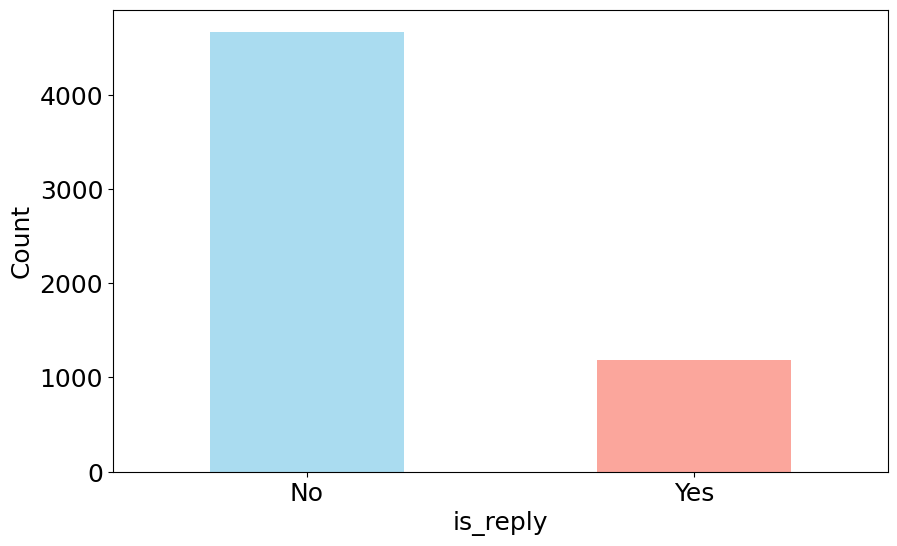

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
raw_data['is_reply'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()



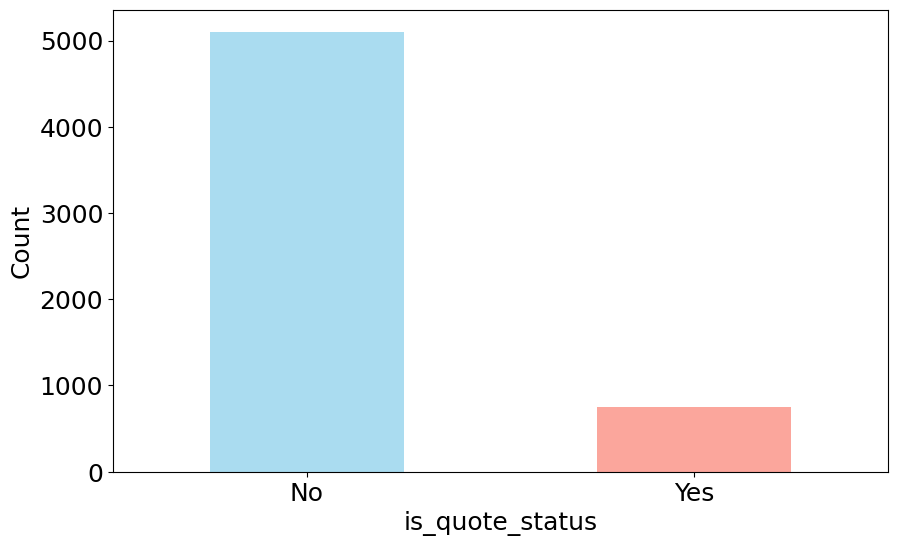

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
raw_data['is_quote_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

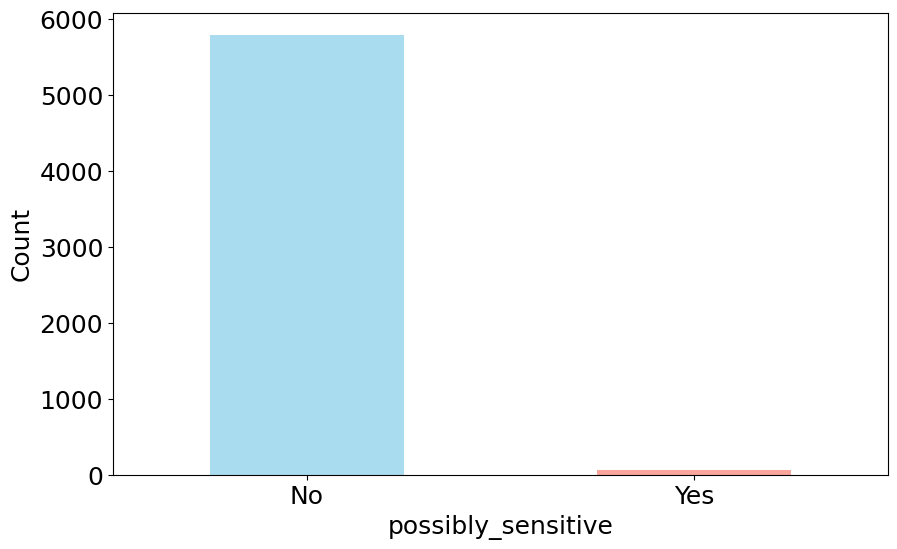

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
raw_data['possibly_sensitive'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [ ]:
import pandas as pd



,hashtag_count
count,5854.000000
mean,2.816877
std,2.627565
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,26.000000


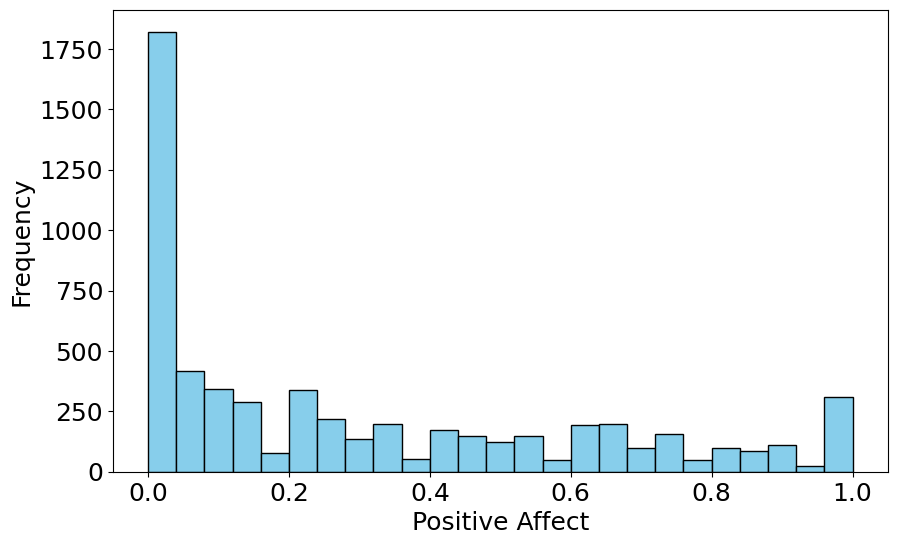

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

plt.figure(figsize=(10, 6))
plt.hist(raw_data['Positive_affect'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Positive Affect')
plt.ylabel('Frequency')
plt.show()


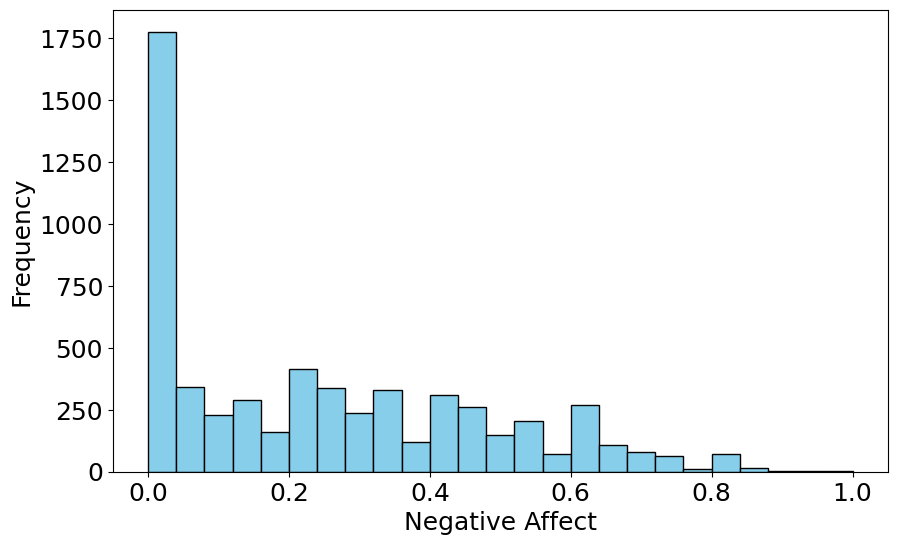

In [ ]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
plt.hist(raw_data['Negative_affect'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Negative Affect')
plt.ylabel('Frequency')
plt.show()

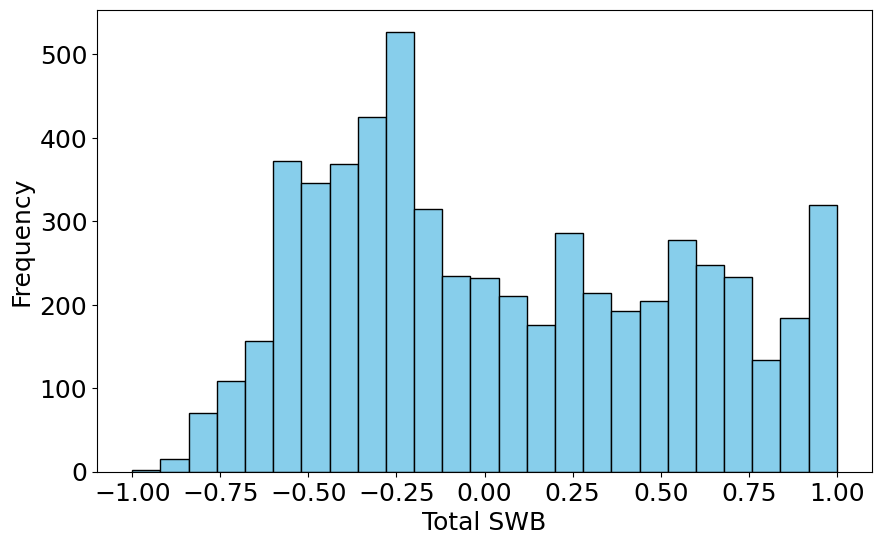

In [ ]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))
plt.hist(raw_data['SWB'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Total SWB')
plt.ylabel('Frequency')
plt.show()

# CPD

In [ ]:
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])

In [ ]:
pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00


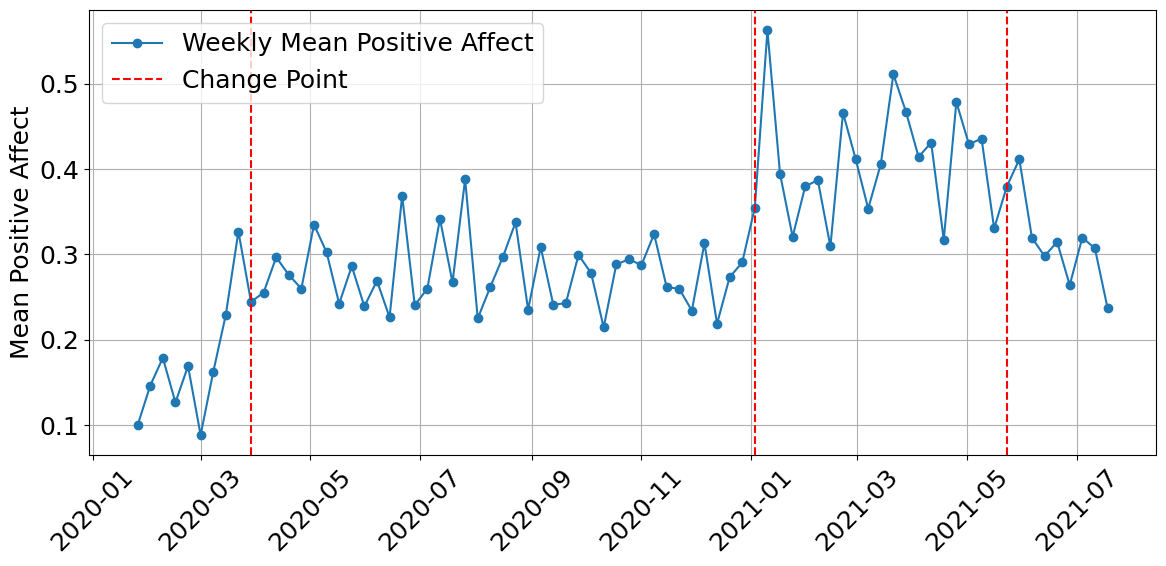

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd

mean_PA_weekly = raw_data.resample('W', on='created_at')['Positive_affect'].mean()
signal = mean_PA_weekly.values

model = rpt.Pelt(model="rbf").fit(signal)
change_points = model.predict(pen=2)

plt.rcParams['font.size'] = 18

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(mean_PA_weekly.index, signal, marker='o', label='Weekly Mean Positive Affect')
for cp in change_points:
    if cp<len(mean_PA_weekly):
        plt.axvline(mean_PA_weekly.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.ylabel('Mean Positive Affect')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

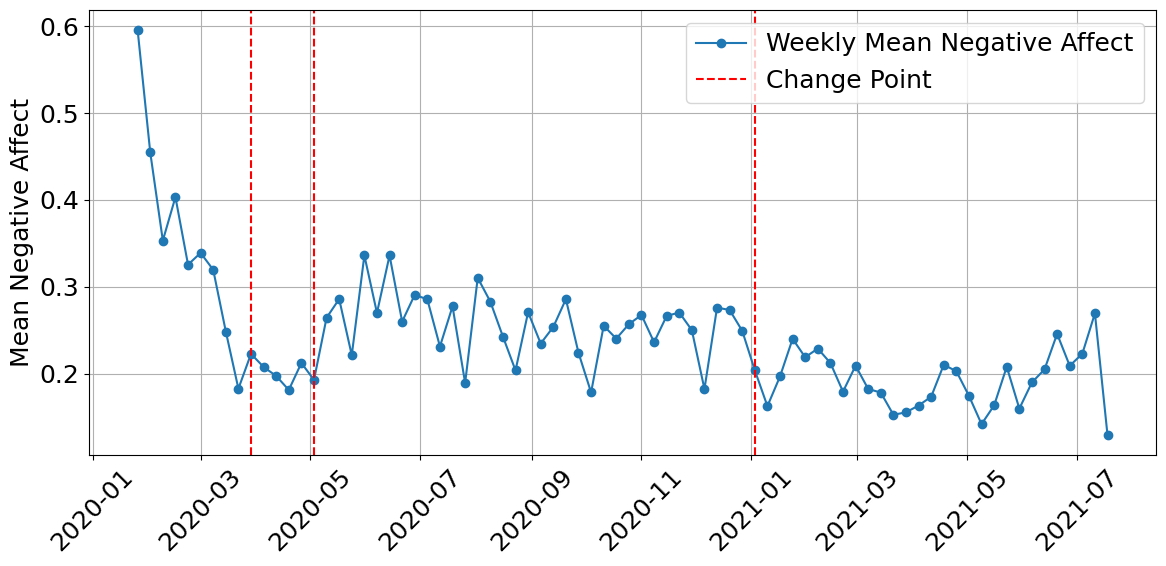

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd

mean_NA_weekly = raw_data.resample('W', on='created_at')['Negative_affect'].mean()
signal = mean_NA_weekly.values

model = rpt.Pelt(model="rbf").fit(signal)
change_points = model.predict(pen=2)
plt.rcParams['font.size'] = 18

plt.figure(figsize=(12, 6))
plt.plot(mean_NA_weekly.index, signal,marker='o', label='Weekly Mean Negative Affect')
for cp in change_points:
    if cp<len(mean_NA_weekly):
        plt.axvline(mean_NA_weekly.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.ylabel('Mean Negative Affect')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


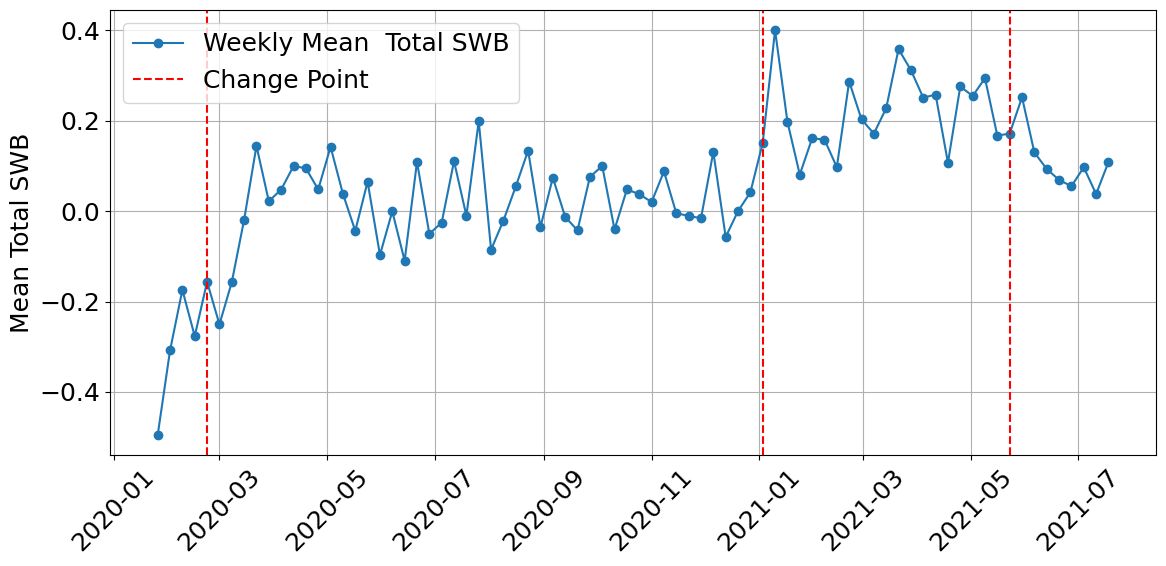

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd

mean_SWB_weekly = raw_data.resample('W', on='created_at')['SWB'].mean()
signal = mean_SWB_weekly.values

model = rpt.Pelt(model="rbf").fit(signal)
change_points = model.predict(pen=1)  # Adjust TreTre  value for sensitivity

plt.rcParams['font.size'] = 18

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(mean_SWB_weekly.index, signal, marker='o',label='Weekly Mean  Total SWB')
for cp in change_points:
    if cp<len(mean_SWB_weekly):
        plt.axvline(mean_SWB_weekly.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.ylabel('Mean Total SWB')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
